First of all let's look at those pictures. We don't often see a dataset that includes a CSV file and two PNGs, so they must be important.

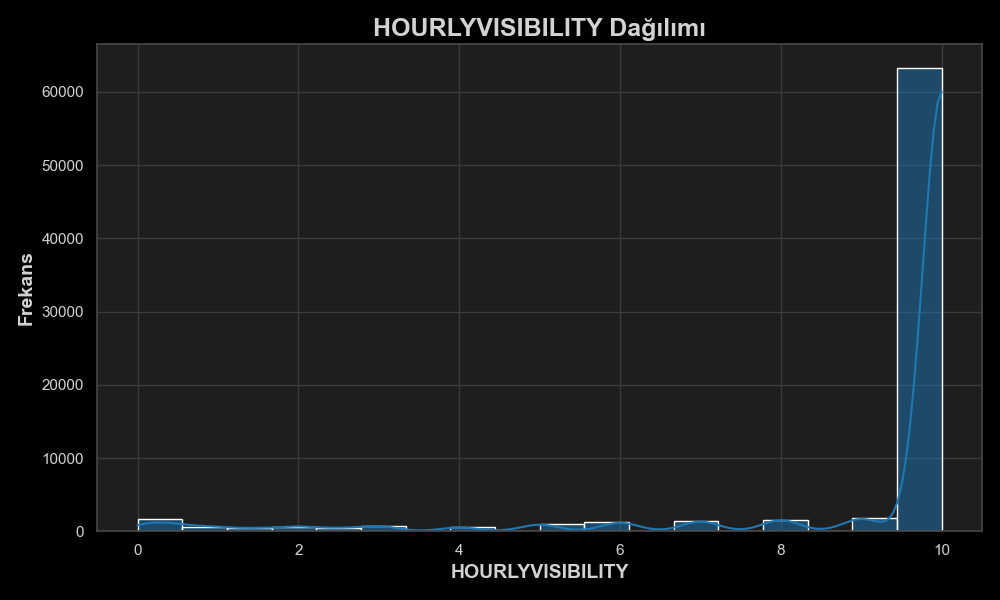

In [1]:
from IPython.display import Image
Image(filename='/kaggle/input/jfk-airport-weather-dataset-2010-2018/degisken_gorsel.png') 

Sadly, no. It looks like we have a picture of someone's homework. How about the other one?

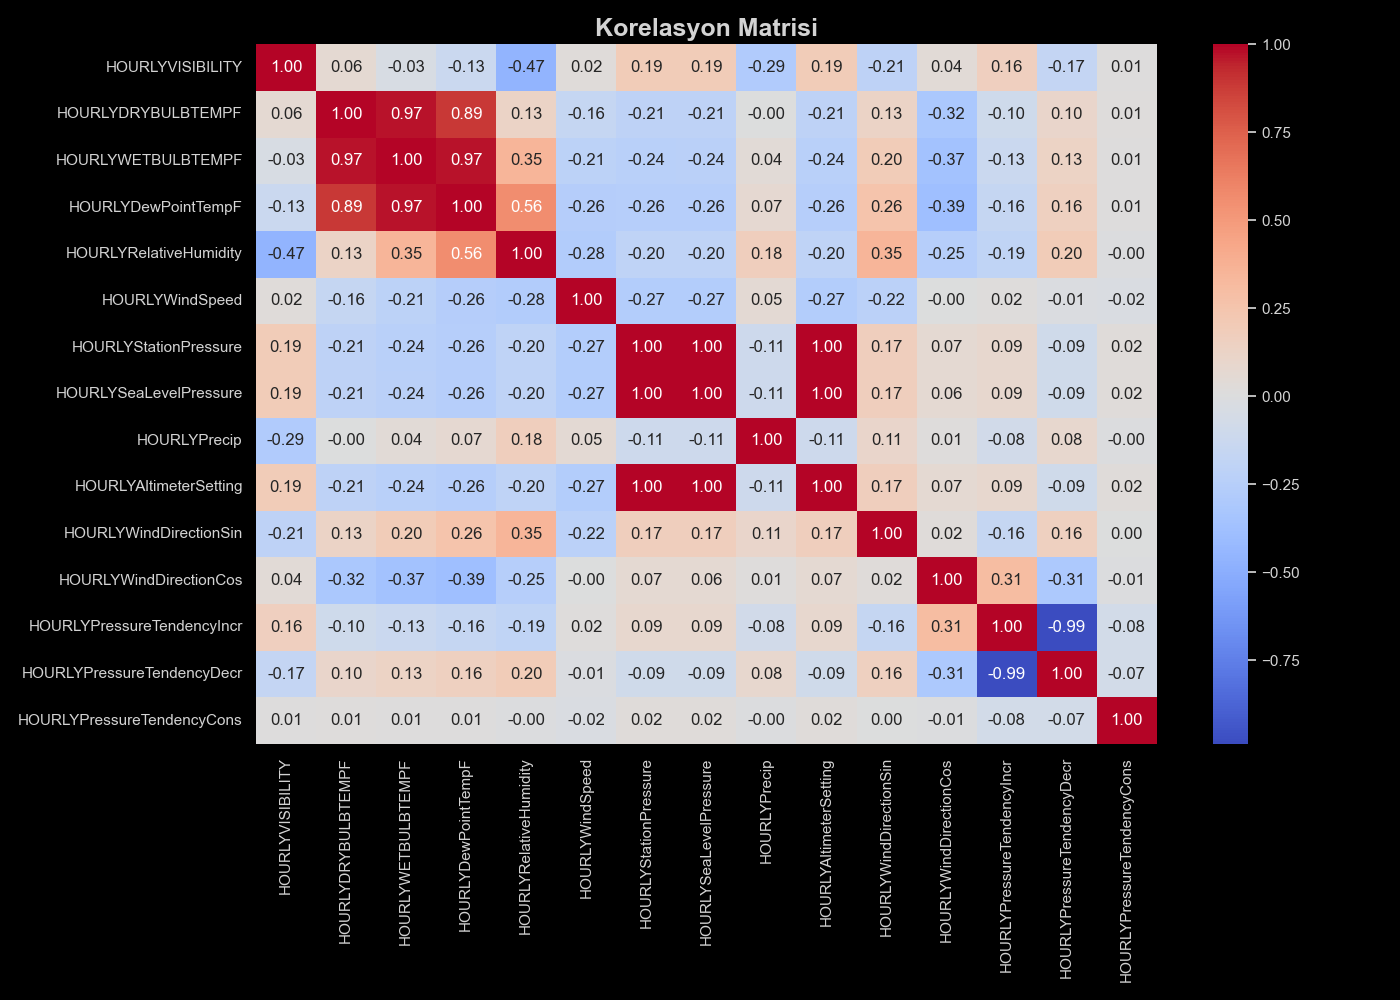

In [2]:
from IPython.display import Image
Image(filename='/kaggle/input/jfk-airport-weather-dataset-2010-2018/korelasyon_matrisi.png') 

That one is kind of interesting, because it shows that some of our variables are perfectly correlated, which is kind of a surprise.

Also, because someone has kindly included those two images we don't have to regenerate them to know what they look like. So that's nice.

In [3]:
import pandas as pd

DATA = '/kaggle/input/jfk-airport-weather-dataset-2010-2018/jfk_weather_cleaned.csv'
df = pd.read_csv(filepath_or_buffer=DATA, parse_dates=['DATE'])
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['hour'] = df['DATE'].dt.hour
hourly_columns = [column for column in df.columns if column.startswith('HOURLY')]
df.head()

,DATE,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons,year,month,hour
0,2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.0,1.0,0,1,0,2010,1,1
1,2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.0,1.0,0,1,0,2010,1,2
2,2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.00,29.99,0.0,1.0,0,1,0,2010,1,3
3,2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.95,29.97,0.00,29.97,0.0,1.0,0,1,0,2010,1,4
4,2010-01-01 05:00:00,5.0,33.0,32.0,31.0,92.0,0.0,29.93,29.96,0.00,29.95,0.0,1.0,0,1,0,2010,1,5


We know from the data card that we have eight, maybe nine, years of data; how many observations per year do we have?

In [4]:
df['year'].value_counts().sort_index().to_frame().T

year,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,8759,8760,8784,8760,8760,8760,8784,8760,4992


We have a little over eight and a half years of data. That's a lot of data.

Let's do some easy stuff first. Let's see what variables have obvious trends on a monthly basis.

In [5]:
from plotly import express
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)

express.line(data_frame=df[['month'] + hourly_columns].groupby(by='month').mean().reset_index(), x='month', y=hourly_columns).show(renderer='iframe_connected')

What do we see? The hourly temperatures exhibit clear montly seasonality; humidity and windspeed look like they're probably noisy constants; the other series exhibit no obvious seasonality.

Let's do the same analysis but for hours of the day.

In [6]:
express.line(data_frame=df[['hour'] + hourly_columns].groupby(by='hour').mean().reset_index(), x='hour', y=hourly_columns).show(renderer='iframe_connected')

What do we see? Humidity, temperatures, and windspeed have clear if small hourly trends.

Now let's look at trends over years. We expect to see none; or rather, we expect any trend we see to be minor/noise.

In [7]:
express.line(data_frame=df[['year'] + hourly_columns].groupby(by='year').mean().reset_index(), x='year', y=hourly_columns).show(renderer='iframe_connected')

And in fact what we see is that almost everything is essentially a straight line. The bends we see from 2017 into 2018 are more likely due to the fact that we have a partial dataset for 2018 rather than being a real trend. 

In [8]:
df[['HOURLYStationPressure', 'HOURLYSeaLevelPressure', 'HOURLYAltimeterSetting']].corr()

,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYAltimeterSetting
HOURLYStationPressure,1.000000,0.999887,0.999993
HOURLYSeaLevelPressure,0.999887,1.000000,0.999893
HOURLYAltimeterSetting,0.999993,0.999893,1.000000


Interestingly, some of the values that look perfectly correlated in the correlation heatmaps and in the line plots above aren't actually perfectly correlated. They're really close, but they're not the same.

In [9]:
df[['HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF']].corr()

,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF
HOURLYDRYBULBTEMPF,1.000000,0.969991
HOURLYWETBULBTEMPF,0.969991,1.000000
